Importing Libraries

In [15]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

Loading the Data

In [16]:
housing_dataset = sklearn.datasets.fetch_california_housing()
df = pd.DataFrame(housing_dataset.data, columns = housing_dataset.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Checking the Data

In [17]:
print(f'Shape of the Dataset : {df.shape}')
print('\n')
print('Dataset Information')
print(df.info())
print('\n')
print('Empty Datapoints')
print(df.isnull().sum())

Shape of the Dataset : (20640, 8)


Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None


Empty Datapoints
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


Understanding the Correlation

<AxesSubplot:>

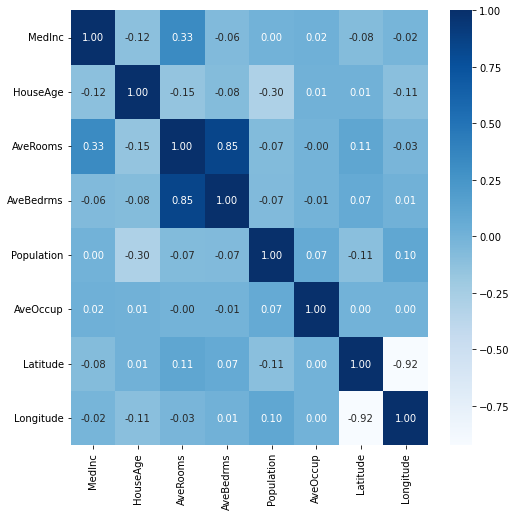

In [18]:
cor = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(cor, cmap='Blues', cbar=True, annot = True, fmt ='.2f')

Features and Targets

In [19]:
x = df
y = housing_dataset.target

Splitting Data into Training Data and Testing Data

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

Training the Model

In [21]:
model = XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

Model Prediction on Training Data

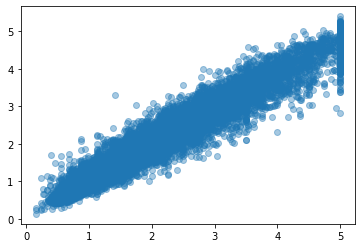

In [22]:
y_trainPredict = model.predict(x_train)
plt.scatter(y_train,y_trainPredict,alpha=0.4)

Error in Training Data Prediction

In [23]:
score1 = metrics.mean_squared_error(y_train,y_trainPredict)
print(f"Mean Squared Error in Training Data: {score1}")

Mean Squared Error in Training Data: 0.07285702676444845


Model Prediction on Testing Data

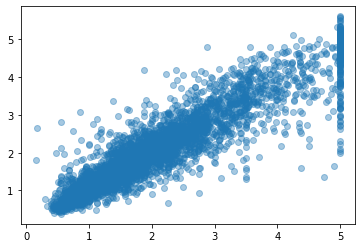

In [24]:
y_testPredict = model.predict(x_test)
plt.scatter(y_test, y_testPredict, alpha = 0.4)

Error in Testing Data Prediction

In [25]:
score2 = metrics.mean_squared_error(y_test,y_testPredict)
print(f"Mean Squared Error in Testing Data: {score2}")

Mean Squared Error in Testing Data: 0.21378564728069277


Model Score

In [26]:
print(f"The score for the model is {model.score(x_test,y_test)}")

The score for the model is 0.8412904408180302
